## Carregar base de Dados

In [ ]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [ ]:
data = pd.read_excel('basetccfinal.xlsx')
data.head()


,Unnamed: 0,Index,Business Unit Cd,Business Unit Desc,CNPJ / CPF,Cod Comprador Contrato,Cod Comprador Ped Atual,Cod Condição Pagamento,Cod Familia Item,Cod Filial / Fábrica,...,preco_std,preco_min,preco_std_br,preco_mediana_br,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br,Generico
0,0,0,-1,NAO SE APLICA,40174724,-2,-2,R87,MES,RBA466,...,0.0,37.035313,15.599544,36.727587,37.035313,0,0.013725,0.027451,216.808773,N
1,1,1,-1,NAO SE APLICA,40174724,-2,-2,R87,MES,RBA466,...,0.0,260.307600,162.887908,695.056000,260.307600,0,0.000000,0.000000,216.133185,N
2,2,2,-1,NAO SE APLICA,40174724,-2,-2,R87,MES,RBA466,...,0.0,193.848000,294.594737,193.848000,193.848000,0,0.000000,0.000000,216.328192,N
3,3,3,-1,NAO SE APLICA,45013796,-2,-2,R86,WTF,RBA466,...,0.0,417.132000,167.328014,625.950000,417.132000,0,0.000000,0.000000,10.894648,N
4,4,4,-1,NAO SE APLICA,45013796,-2,-2,R86,WTF,RBA466,...,0.0,106.087444,8.246118,106.087444,106.087444,0,0.000000,0.007942,10.929289,N


In [ ]:
data.shape

(65596, 56)

In [ ]:
data.describe()

,Unnamed: 0,Index,Cod Comprador Contrato,Cod Comprador Ped Atual,Cod Item,Cod JDE Fornecedor,Mes Emissão NF,Mes Fechamento NF,Mês Criação Pedido,Num Ped Original,...,preco_medio,preco_std,preco_min,preco_std_br,preco_mediana_br,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br
count,65596.000000,65596.000000,6.559600e+04,6.559600e+04,6.559600e+04,6.559600e+04,65596.000000,65596.000000,65596.000000,6.559600e+04,...,6.559600e+04,65596.000000,6.559600e+04,65596.000000,6.559600e+04,6.559600e+04,65596.000000,65596.000000,6.559600e+04,3.460100e+04
mean,33872.021876,33872.021876,9.523521e+06,5.140027e+07,3.943951e+07,4.843123e+07,202181.717361,202185.152875,203938.774697,4.187794e+07,...,1.204675e+03,41.466893,1.170542e+03,359.884461,1.172264e+03,1.128225e+03,0.204525,41.583530,1.212431e+02,2.386664e+03
std,19539.326746,19539.326746,2.044966e+07,7.301907e+06,4.333439e+06,8.321962e+06,41.450786,38.148948,37469.288611,1.206419e+06,...,4.062335e+04,2005.899359,4.049821e+04,5030.396402,4.078408e+04,4.025275e+04,0.646333,1676.439494,6.436557e+03,5.887199e+04
min,0.000000,0.000000,-2.000000e+00,-2.000000e+00,1.000052e+07,2.046000e+03,201709.000000,202101.000000,201711.000000,4.001491e+07,...,7.900000e-03,0.000000,7.900000e-03,0.000000,5.000000e-02,7.900000e-03,0.000000,0.000000,0.000000e+00,3.780000e-02
25%,16854.750000,16854.750000,-1.000000e+00,4.681613e+07,4.001841e+07,4.001732e+07,202201.000000,202201.000000,202112.000000,4.035214e+07,...,7.000000e+00,0.000000,6.250000e+00,1.608668,7.685776e+00,5.554867e+00,0.000000,0.000000,0.000000e+00,6.650000e+00
50%,33875.500000,33875.500000,-1.000000e+00,5.162118e+07,4.005622e+07,4.843846e+07,202203.000000,202203.000000,202202.000000,4.275673e+07,...,3.735000e+01,0.000000,3.355000e+01,20.771846,3.326400e+01,3.034000e+01,0.000000,0.000000,0.000000e+00,3.571167e+01
75%,50803.250000,50803.250000,-1.000000e+00,5.758141e+07,4.013243e+07,5.594172e+07,202205.000000,202205.000000,202204.000000,4.278281e+07,...,1.991905e+02,0.000000,1.807143e+02,150.122211,1.576700e+02,1.620000e+02,0.000000,0.000000,0.000000e+00,2.507008e+02
max,67589.000000,67589.000000,6.218833e+07,6.230625e+07,4.018844e+07,6.250135e+07,202206.000000,202206.000000,999999.000000,4.281252e+07,...,9.544800e+06,216813.665133,9.544800e+06,285026.200898,9.544800e+06,9.544800e+06,4.000000,214100.440575,1.046368e+06,9.536075e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65596 entries, 0 to 65595
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    65596 non-null  int64  
 1   Index                         65596 non-null  int64  
 2   Business Unit Cd              65596 non-null  object 
 3   Business Unit Desc            65596 non-null  object 
 4   CNPJ / CPF                    65596 non-null  object 
 5   Cod Comprador Contrato        65596 non-null  int64  
 6   Cod Comprador Ped Atual       65596 non-null  int64  
 7   Cod Condição Pagamento        65596 non-null  object 
 8   Cod Familia Item              65596 non-null  object 
 9   Cod Filial / Fábrica          65596 non-null  object 
 10  Cod Item                      65596 non-null  int64  
 11  Cod JDE Fornecedor            65596 non-null  int64  
 12  Depto Comprador Contrato      65596 non-null  object 
 13  D

In [ ]:
n = data.nunique(axis=0)
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 Unnamed: 0                      65596
Index                           65596
Business Unit Cd                 1004
Business Unit Desc                370
CNPJ / CPF                       3413
Cod Comprador Contrato             68
Cod Comprador Ped Atual           339
Cod Condição Pagamento             72
Cod Familia Item                  221
Cod Filial / Fábrica              128
Cod Item                        19037
Cod JDE Fornecedor               3428
Depto Comprador Contrato           11
Descrição Condição Pagamento       59
Dsc 1 Item                      17361
Dsc 2 Item                      13720
Dsc Familia Item                  221
Dsc Filial / Fábrica              125
Dsc Tipo Pedido                    11
Mes Emissão NF                     33
Mes Fechamento NF                  18
Mês Criação Pedido                 38
Nom Comprador Ped Atual           333
Nome Comprador Contrato            67
Nome Conta                        152
Nome Fornece

In [ ]:
data2=data.copy()
data2=data2.drop(columns=['preco','Total Impostos (ICMS e FCP)','Index','Cod Familia Item','Dsc 1 Item','Business Unit Cd', 'Business Unit Desc','CNPJ / CPF','Cod Comprador Contrato','Cod Comprador Ped Atual','Cod Filial / Fábrica','Depto Comprador Contrato','Dsc 2 Item','Dsc Familia Item','Dsc Filial / Fábrica','Nom Comprador Ped Atual','Nom Comprador Ped Atual','Nome Comprador Contrato','Número Contrato','Servico (S/N)','Subconta','Unidade Medida Compra','Área Suprimentos Atual','Área Suprimentos Original','Área Suprimentos','dolarizar','Dsc Tipo Pedido','Descrição Condição Pagamento','Nome Conta','Tipo Conta','Mes Emissão NF','Mês Criação Pedido','Generico'])
data2 = data2.loc[:, ~data2.columns.str.contains('^Unnamed')]

In [ ]:
data2.head()

,Cod Condição Pagamento,Cod Item,Cod JDE Fornecedor,Mes Fechamento NF,Nome Fornecedor,Num Ped Original,Tipo Ped Original,Uf Fornecedor,custo_un,preco_total,...,preco_medio,preco_std,preco_min,preco_std_br,preco_mediana_br,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br
0,R87,40177692,40174724,202102,Respironics Inc,40014907,OI,PA,220.969231,28726.00,...,37.035313,0.0,37.035313,15.599544,36.727587,37.035313,0,0.013725,0.027451,216.808773
1,R87,40177693,40174724,202102,Respironics Inc,40014907,OI,PA,220.969278,39774.47,...,260.307600,0.0,260.307600,162.887908,695.056000,260.307600,0,0.000000,0.000000,216.133185
2,R87,40177694,40174724,202102,Respironics Inc,40014907,OI,PA,220.969111,9943.61,...,193.848000,0.0,193.848000,294.594737,193.848000,193.848000,0,0.000000,0.000000,216.328192
3,R86,40015463,45013796,202110,Gentec Shangai Corporation,40015232,OI,ZZ,10.876288,59895.72,...,417.132000,0.0,417.132000,167.328014,625.950000,417.132000,0,0.000000,0.000000,10.894648
4,R86,40015465,45013796,202105,Gentec Shangai Corporation,40015232,OI,ZZ,10.817167,25431.16,...,106.087444,0.0,106.087444,8.246118,106.087444,106.087444,0,0.000000,0.007942,10.929289


In [ ]:
data2.shape


(65596, 23)

In [ ]:
col = data2.select_dtypes(exclude=['number']).columns.tolist()
for col in data2.columns:
    unique_values = set(data2[col].apply(type))
    print(col, unique_values)

Cod Condição Pagamento {<class 'str'>, <class 'int'>}
Cod Item {<class 'int'>}
Cod JDE Fornecedor {<class 'int'>}
Mes Fechamento NF {<class 'int'>}
Nome Fornecedor {<class 'str'>}
Num Ped Original {<class 'int'>}
Tipo Ped Original {<class 'str'>}
Uf Fornecedor {<class 'str'>, <class 'float'>}
custo_un {<class 'float'>}
preco_total {<class 'float'>}
quantidade {<class 'float'>}
data_fechamento {<class 'str'>}
dolar_valor {<class 'float'>}
preco_medio {<class 'float'>}
preco_std {<class 'float'>}
preco_min {<class 'float'>}
preco_std_br {<class 'float'>}
preco_mediana_br {<class 'float'>}
preco_min_all {<class 'float'>}
cons_preco {<class 'int'>}
economia_media {<class 'float'>}
economia_min {<class 'float'>}
custo_medio_br {<class 'float'>}


In [ ]:
# converter todas as colunas numéricas para float
num_cols = data2.select_dtypes(include=[int, float]).columns
data2.loc[:, num_cols] = data2.loc[:, num_cols].astype('float').copy()

# converter todas as colunas de texto para string
text_cols = data2.select_dtypes(include=object).columns
data2.loc[:, text_cols] = data2.loc[:, text_cols].astype('object').copy()

<ipython-input-11-0350035a6b8a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data2.loc[:, num_cols] = data2.loc[:, num_cols].astype('float').copy()


In [ ]:

for col in data2.columns:
    unique_values = set(data2[col].apply(type))
    print(col, unique_values)

Cod Condição Pagamento {<class 'str'>, <class 'int'>}
Cod Item {<class 'float'>}
Cod JDE Fornecedor {<class 'float'>}
Mes Fechamento NF {<class 'float'>}
Nome Fornecedor {<class 'str'>}
Num Ped Original {<class 'float'>}
Tipo Ped Original {<class 'str'>}
Uf Fornecedor {<class 'str'>, <class 'float'>}
custo_un {<class 'float'>}
preco_total {<class 'float'>}
quantidade {<class 'float'>}
data_fechamento {<class 'str'>}
dolar_valor {<class 'float'>}
preco_medio {<class 'float'>}
preco_std {<class 'float'>}
preco_min {<class 'float'>}
preco_std_br {<class 'float'>}
preco_mediana_br {<class 'float'>}
preco_min_all {<class 'float'>}
cons_preco {<class 'float'>}
economia_media {<class 'float'>}
economia_min {<class 'float'>}
custo_medio_br {<class 'float'>}


In [ ]:
# Identificar as colunas datetime64
cols_datetime = data2.select_dtypes(include=['datetime64']).columns.tolist()

# Imprimir as colunas identificadas
print(cols_datetime)

[]


# Transformação de variáveis categórias em númericas usando LabelEncoder

In [ ]:
data2['data_fechamento'] = pd.to_datetime(data2['data_fechamento'])

In [ ]:
data2['data_fechamento'].head()

0   2021-02-01
1   2021-02-01
2   2021-02-01
3   2021-10-01
4   2021-05-01
Name: data_fechamento, dtype: datetime64[ns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load

# Separar as variáveis numéricas das categóricas
Colunas_num = data2.select_dtypes(include=['float', 'int']).columns.tolist()
X_numerical = data2[Colunas_num]

# Criar um dicionário para armazenar os objetos LabelEncoder
label_encoders = {}
data_transf= pd.DataFrame()
colunas_obj = data2.select_dtypes(include = "object").columns

# Iterar sobre as colunas categóricas do dataframe
for obj in colunas_obj:
    # Criar um novo objeto LabelEncoder
    le = LabelEncoder()
    # Aplicar o LabelEncoder na coluna categórica
    data_transf[obj] = le.fit_transform(data2[obj].astype(str))
    # Salvar o objeto LabelEncoder em um arquivo
    dump(le, f'{obj}_label_encoder.joblib')
    # Armazenar o objeto LabelEncoder no dicionário
    label_encoders[obj] = le

# Converter a coluna datetime64 para segundos desde o Unix Epoch
unix_time = data2['data_fechamento'].min()
X_date = (data2['data_fechamento'] - unix_time).dt.total_seconds()

# Criação do novo dataframe
df_tratado = pd.concat([X_numerical, data_transf, X_date], axis=1)
df_tratado.head()


,Cod Item,Cod JDE Fornecedor,Mes Fechamento NF,Num Ped Original,custo_un,preco_total,quantidade,dolar_valor,preco_medio,preco_std,...,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br,Cod Condição Pagamento,Nome Fornecedor,Tipo Ped Original,Uf Fornecedor,data_fechamento
0,40177692.0,40174724.0,202102.0,40014907.0,220.969231,28726.00,130.0,5.42,37.035313,0.0,...,37.035313,0.0,0.013725,0.027451,216.808773,52,2656,4,23,2678400.0
1,40177693.0,40174724.0,202102.0,40014907.0,220.969278,39774.47,180.0,5.42,260.307600,0.0,...,260.307600,0.0,0.000000,0.000000,216.133185,52,2656,4,23,2678400.0
2,40177694.0,40174724.0,202102.0,40014907.0,220.969111,9943.61,45.0,5.42,193.848000,0.0,...,193.848000,0.0,0.000000,0.000000,216.328192,52,2656,4,23,2678400.0
3,40015463.0,45013796.0,202110.0,40015232.0,10.876288,59895.72,5507.0,5.53,417.132000,0.0,...,417.132000,0.0,0.000000,0.000000,10.894648,51,1284,4,39,23587200.0
4,40015465.0,45013796.0,202105.0,40015232.0,10.817167,25431.16,2351.0,5.29,106.087444,0.0,...,106.087444,0.0,0.000000,0.007942,10.929289,51,1284,4,39,10368000.0


In [ ]:
print(df_tratado.isna().sum())

Cod Item                      0
Cod JDE Fornecedor            0
Mes Fechamento NF             0
Num Ped Original              0
custo_un                      0
preco_total                   0
quantidade                    0
dolar_valor                   0
preco_medio                   0
preco_std                     0
preco_min                     0
preco_std_br                  0
preco_mediana_br              0
preco_min_all                 0
cons_preco                    0
economia_media                0
economia_min                  0
custo_medio_br            30995
Cod Condição Pagamento        0
Nome Fornecedor               0
Tipo Ped Original             0
Uf Fornecedor                 0
data_fechamento               0
dtype: int64


In [ ]:
for col in df_tratado.columns:
    unique_values = set(df_tratado[col].apply(type))
    print(col, unique_values)

Cod Item {<class 'float'>}
Cod JDE Fornecedor {<class 'float'>}
Mes Fechamento NF {<class 'float'>}
Num Ped Original {<class 'float'>}
custo_un {<class 'float'>}
preco_total {<class 'float'>}
quantidade {<class 'float'>}
dolar_valor {<class 'float'>}
preco_medio {<class 'float'>}
preco_std {<class 'float'>}
preco_min {<class 'float'>}
preco_std_br {<class 'float'>}
preco_mediana_br {<class 'float'>}
preco_min_all {<class 'float'>}
cons_preco {<class 'float'>}
economia_media {<class 'float'>}
economia_min {<class 'float'>}
custo_medio_br {<class 'float'>}
Cod Condição Pagamento {<class 'int'>}
Nome Fornecedor {<class 'int'>}
Tipo Ped Original {<class 'int'>}
Uf Fornecedor {<class 'int'>}
data_fechamento {<class 'float'>}


# Tratar missing values


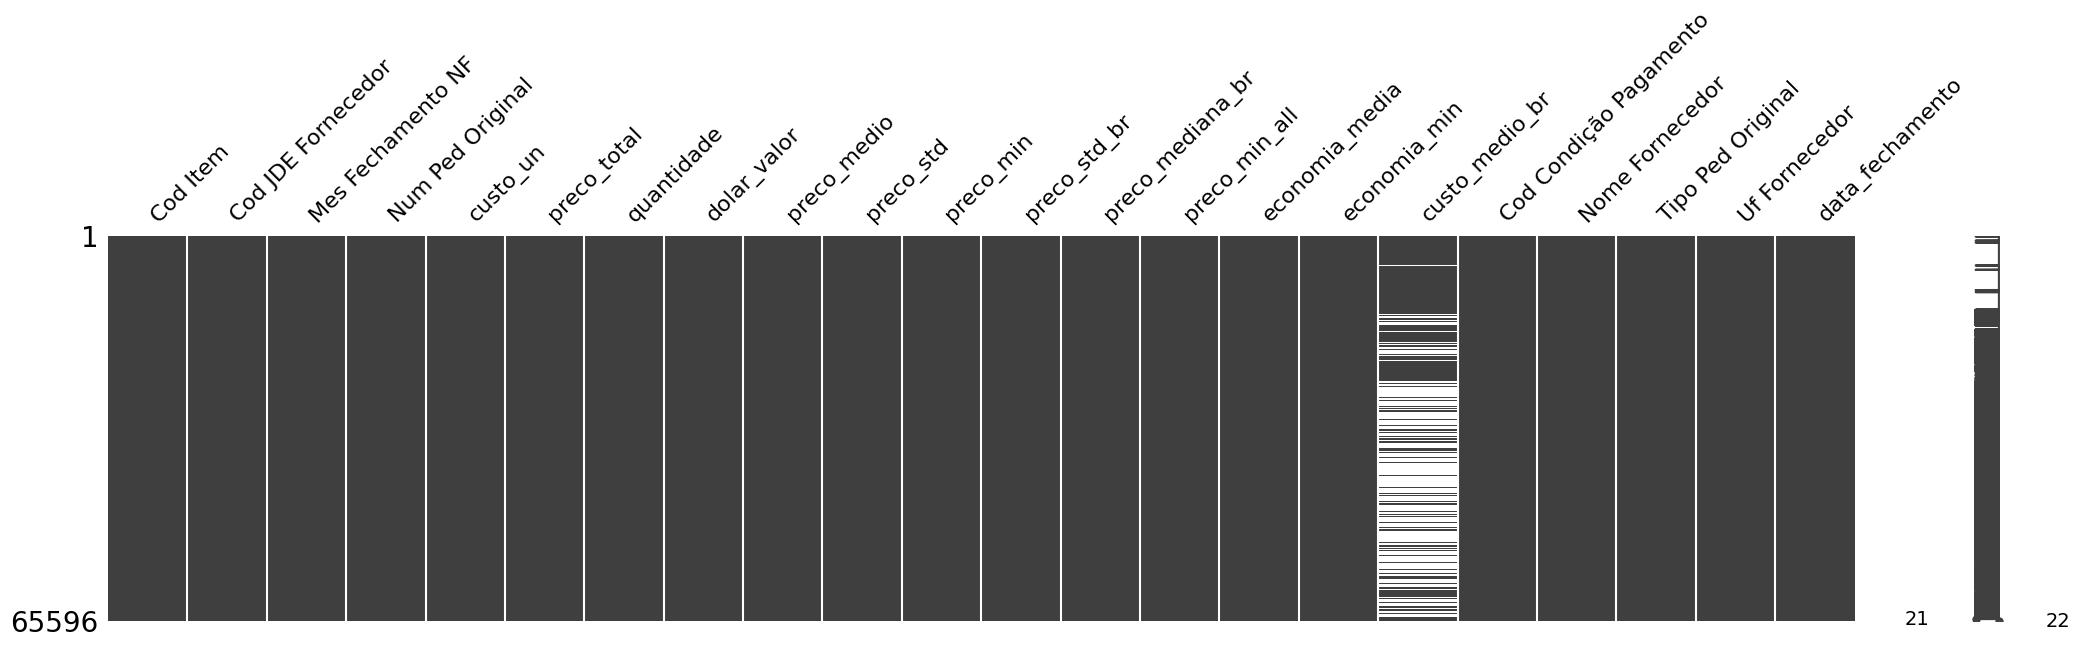

In [ ]:
import missingno as msno
X = df_tratado.drop('cons_preco', axis=1)
msno.matrix(X, figsize=(25,5));

In [ ]:
print(df_tratado.isna().sum())

Cod Item                      0
Cod JDE Fornecedor            0
Mes Fechamento NF             0
Num Ped Original              0
custo_un                      0
preco_total                   0
quantidade                    0
dolar_valor                   0
preco_medio                   0
preco_std                     0
preco_min                     0
preco_std_br                  0
preco_mediana_br              0
preco_min_all                 0
cons_preco                    0
economia_media                0
economia_min                  0
custo_medio_br            30995
Cod Condição Pagamento        0
Nome Fornecedor               0
Tipo Ped Original             0
Uf Fornecedor                 0
data_fechamento               0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Cria um objeto SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', fill_value=0)
X = df_tratado

# Aplica o imputador aos dados de entrada
X_tratado = imputer.fit_transform(X)

data_SVM = pd.DataFrame(X_tratado, columns=df_tratado.columns)

In [ ]:
print(data_SVM.isna().sum())

Cod Item                  0
Cod JDE Fornecedor        0
Mes Fechamento NF         0
Num Ped Original          0
custo_un                  0
preco_total               0
quantidade                0
dolar_valor               0
preco_medio               0
preco_std                 0
preco_min                 0
preco_std_br              0
preco_mediana_br          0
preco_min_all             0
cons_preco                0
economia_media            0
economia_min              0
custo_medio_br            0
Cod Condição Pagamento    0
Nome Fornecedor           0
Tipo Ped Original         0
Uf Fornecedor             0
data_fechamento           0
dtype: int64


In [ ]:
data_SVM.head()

,Cod Item,Cod JDE Fornecedor,Mes Fechamento NF,Num Ped Original,custo_un,preco_total,quantidade,dolar_valor,preco_medio,preco_std,...,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br,Cod Condição Pagamento,Nome Fornecedor,Tipo Ped Original,Uf Fornecedor,data_fechamento
0,40177692.0,40174724.0,202102.0,40014907.0,220.969231,28726.00,130.0,5.42,37.035313,0.0,...,37.035313,0.0,0.013725,0.027451,216.808773,52.0,2656.0,4.0,23.0,2678400.0
1,40177693.0,40174724.0,202102.0,40014907.0,220.969278,39774.47,180.0,5.42,260.307600,0.0,...,260.307600,0.0,0.000000,0.000000,216.133185,52.0,2656.0,4.0,23.0,2678400.0
2,40177694.0,40174724.0,202102.0,40014907.0,220.969111,9943.61,45.0,5.42,193.848000,0.0,...,193.848000,0.0,0.000000,0.000000,216.328192,52.0,2656.0,4.0,23.0,2678400.0
3,40015463.0,45013796.0,202110.0,40015232.0,10.876288,59895.72,5507.0,5.53,417.132000,0.0,...,417.132000,0.0,0.000000,0.000000,10.894648,51.0,1284.0,4.0,39.0,23587200.0
4,40015465.0,45013796.0,202105.0,40015232.0,10.817167,25431.16,2351.0,5.29,106.087444,0.0,...,106.087444,0.0,0.000000,0.007942,10.929289,51.0,1284.0,4.0,39.0,10368000.0


# Pré-Processamento para aplicar o PCA

In [ ]:
from sklearn.decomposition import PCA
data_pca=data_SVM
data_pca.head()

,Cod Item,Cod JDE Fornecedor,Mes Fechamento NF,Num Ped Original,custo_un,preco_total,quantidade,dolar_valor,preco_medio,preco_std,...,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br,Cod Condição Pagamento,Nome Fornecedor,Tipo Ped Original,Uf Fornecedor,data_fechamento
0,40177692.0,40174724.0,202102.0,40014907.0,220.969231,28726.00,130.0,5.42,37.035313,0.0,...,37.035313,0.0,0.013725,0.027451,216.808773,52.0,2656.0,4.0,23.0,2678400.0
1,40177693.0,40174724.0,202102.0,40014907.0,220.969278,39774.47,180.0,5.42,260.307600,0.0,...,260.307600,0.0,0.000000,0.000000,216.133185,52.0,2656.0,4.0,23.0,2678400.0
2,40177694.0,40174724.0,202102.0,40014907.0,220.969111,9943.61,45.0,5.42,193.848000,0.0,...,193.848000,0.0,0.000000,0.000000,216.328192,52.0,2656.0,4.0,23.0,2678400.0
3,40015463.0,45013796.0,202110.0,40015232.0,10.876288,59895.72,5507.0,5.53,417.132000,0.0,...,417.132000,0.0,0.000000,0.000000,10.894648,51.0,1284.0,4.0,39.0,23587200.0
4,40015465.0,45013796.0,202105.0,40015232.0,10.817167,25431.16,2351.0,5.29,106.087444,0.0,...,106.087444,0.0,0.000000,0.007942,10.929289,51.0,1284.0,4.0,39.0,10368000.0


In [ ]:
print(data_pca.columns)

Index(['Cod Item', 'Cod JDE Fornecedor', 'Mes Fechamento NF',
       'Num Ped Original', 'custo_un', 'preco_total', 'quantidade',
       'dolar_valor', 'preco_medio', 'preco_std', 'preco_min', 'preco_std_br',
       'preco_mediana_br', 'preco_min_all', 'cons_preco', 'economia_media',
       'economia_min', 'custo_medio_br', 'Cod Condição Pagamento',
       'Nome Fornecedor', 'Tipo Ped Original', 'Uf Fornecedor',
       'data_fechamento'],
      dtype='object')


In [ ]:
#Vamos aplicar o PCA para buscar melhorar o modelo, avaliando o impacto desta etapa nos esultados do modelo.
#Pré-processamento PCA (padronização e normalização). 
#Como o PCA é sensível à escala dos dados, vamos usar o fit_transform para ajustar a escala dos dados com base na distribuição e transformar os dados originais para que possam ser utilizados pelo PCA.
# Vamos também utilizar o StandardScaler para padronizar os recursos do conjunto de dados (Média 0 e desvio 1)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

y = data_pca['cons_preco']
X_numerical = data_pca.drop('cons_preco', axis=1)

# Aplicar normalização nos dados numéricos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Juntar a variável target novamente com os dados normalizados
data_normalized = pd.concat([pd.DataFrame(X_normalized , columns=X_numerical.columns), y], axis=1)

print(data_normalized.columns)



Index(['Cod Item', 'Cod JDE Fornecedor', 'Mes Fechamento NF',
       'Num Ped Original', 'custo_un', 'preco_total', 'quantidade',
       'dolar_valor', 'preco_medio', 'preco_std', 'preco_min', 'preco_std_br',
       'preco_mediana_br', 'preco_min_all', 'economia_media', 'economia_min',
       'custo_medio_br', 'Cod Condição Pagamento', 'Nome Fornecedor',
       'Tipo Ped Original', 'Uf Fornecedor', 'data_fechamento', 'cons_preco'],
      dtype='object')


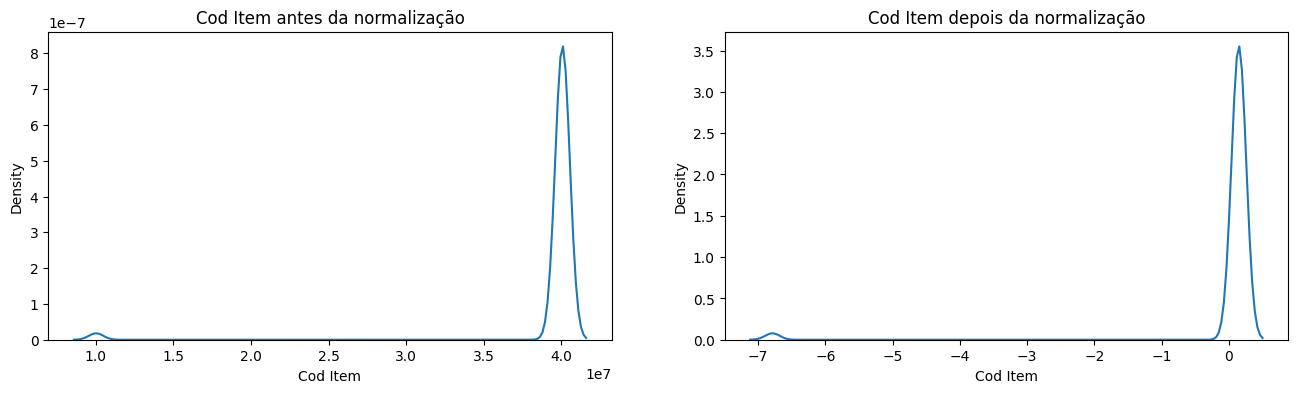

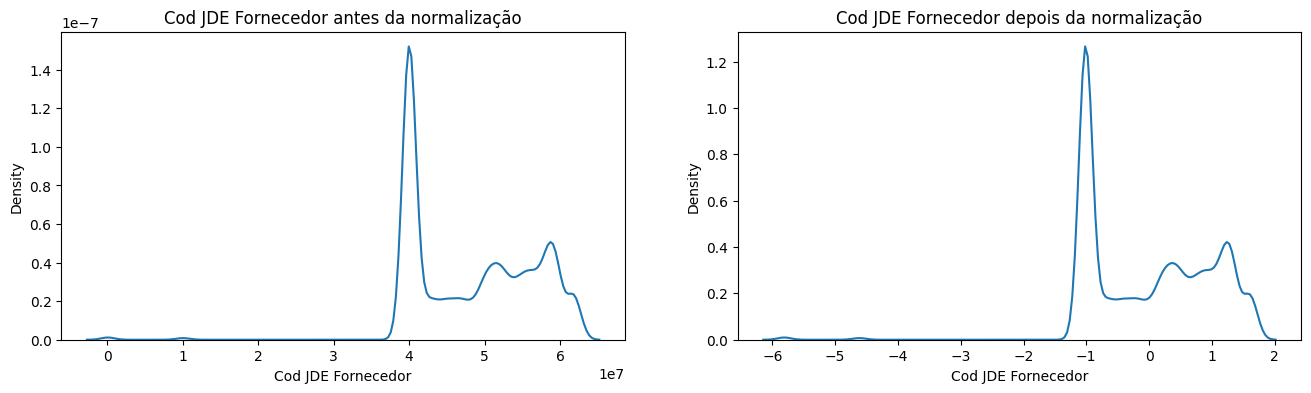

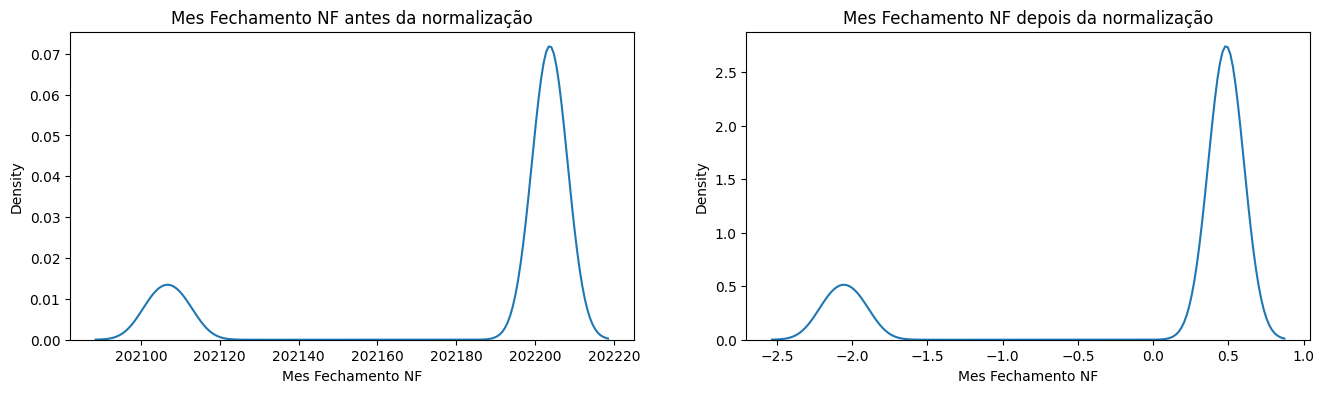

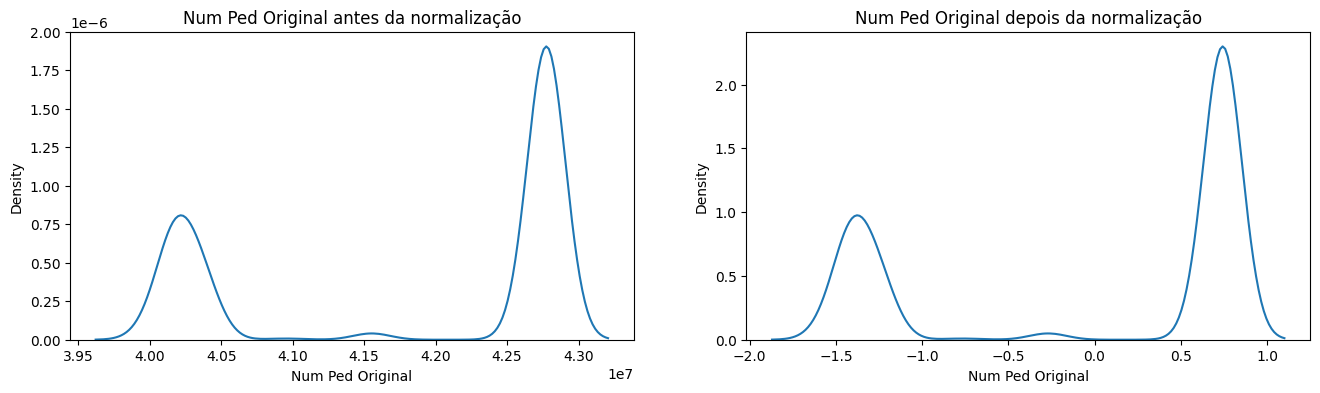

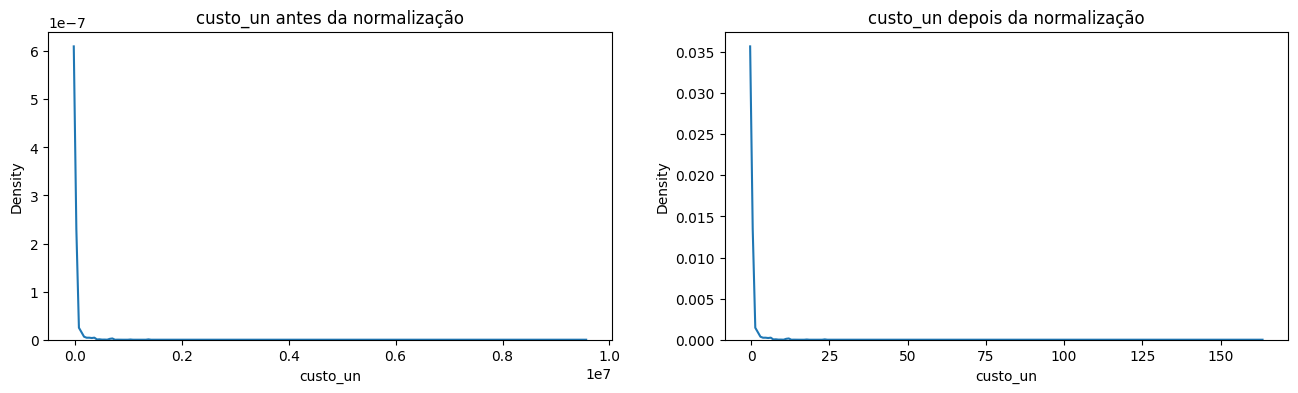

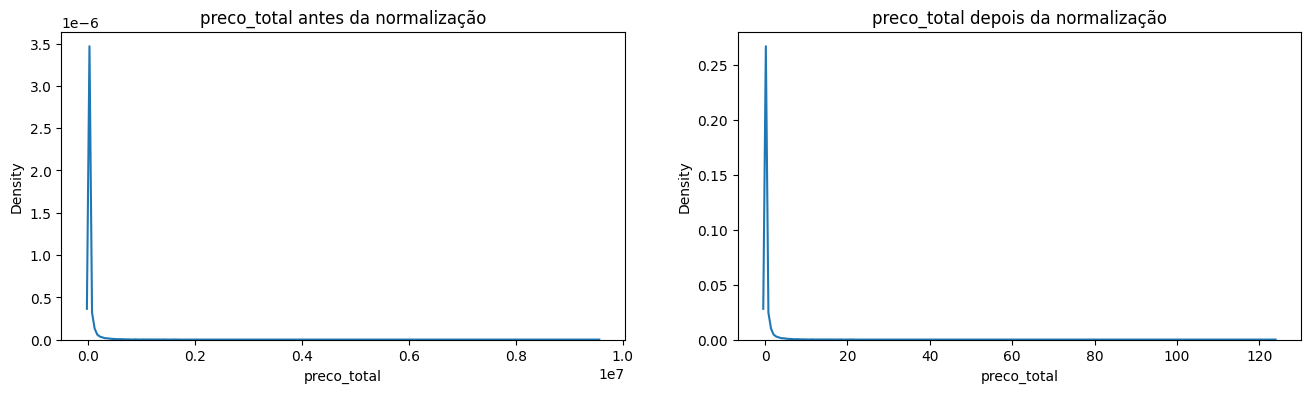

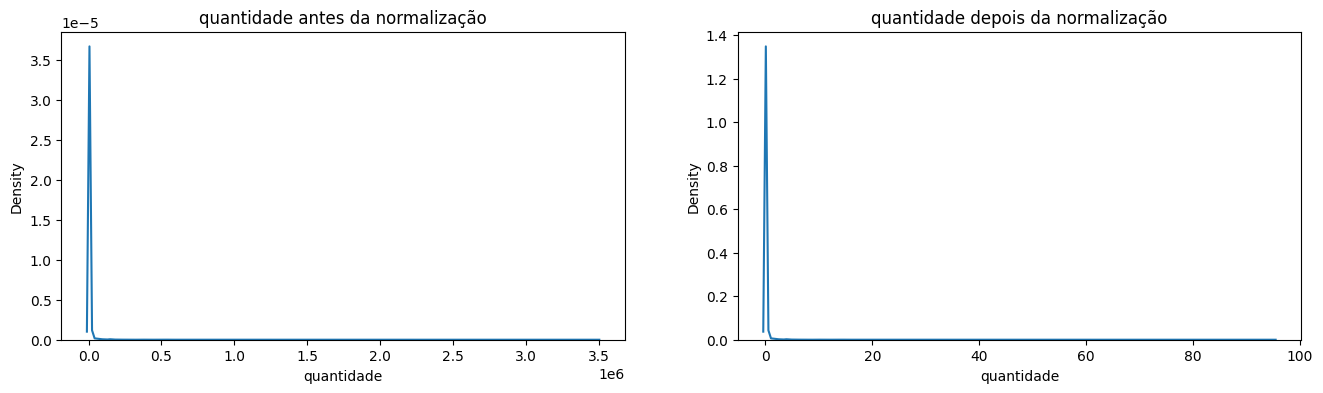

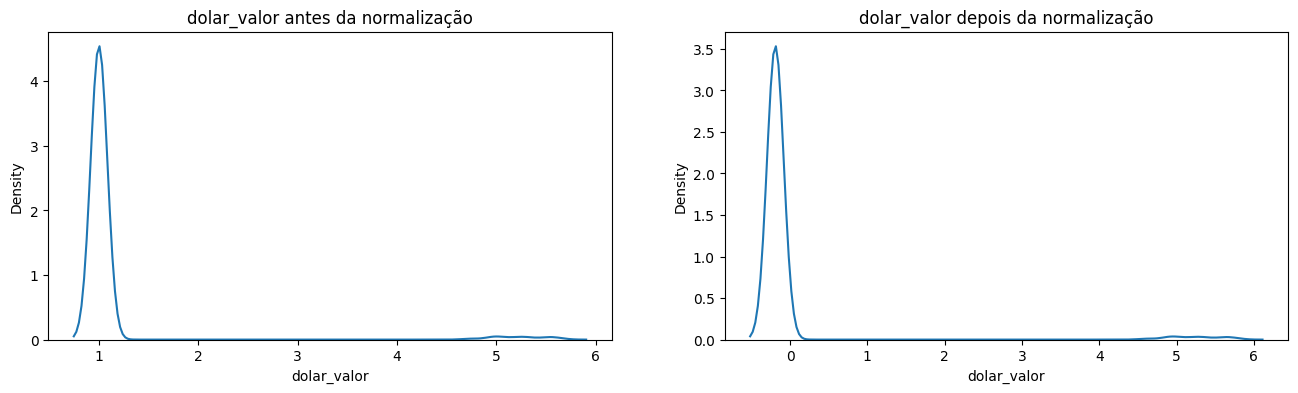

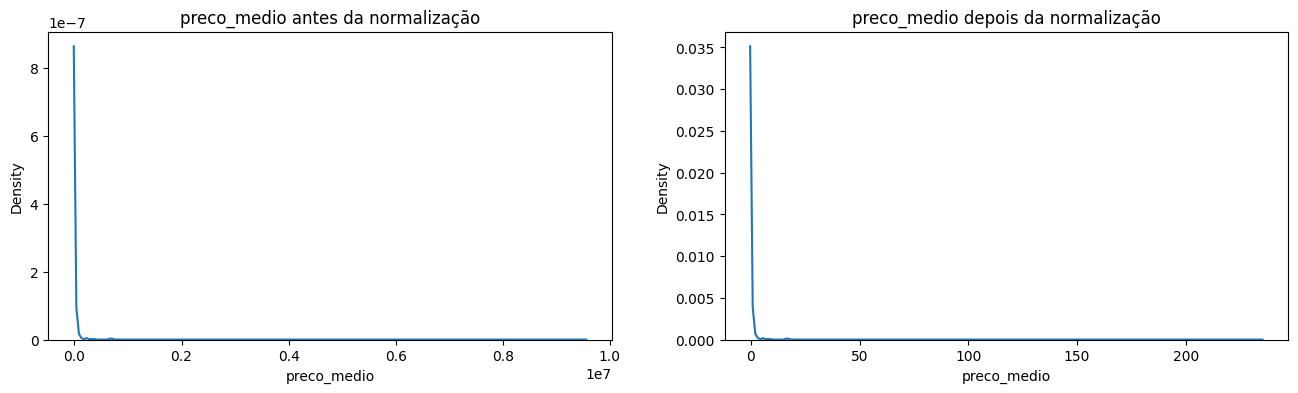

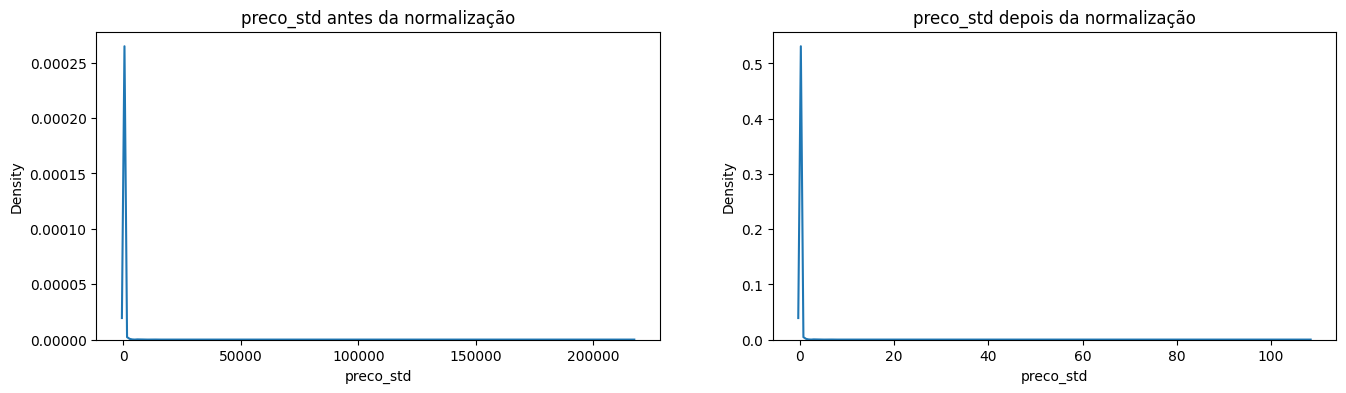

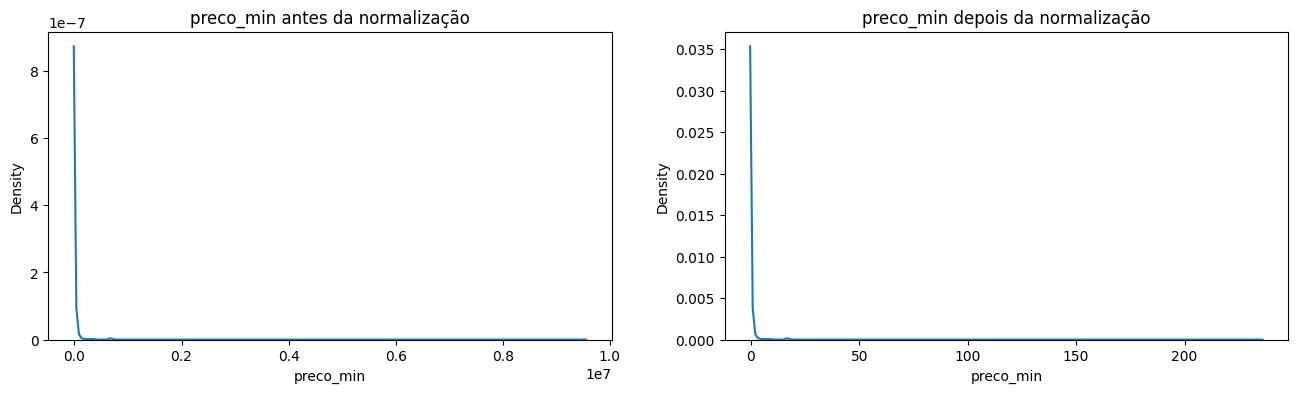

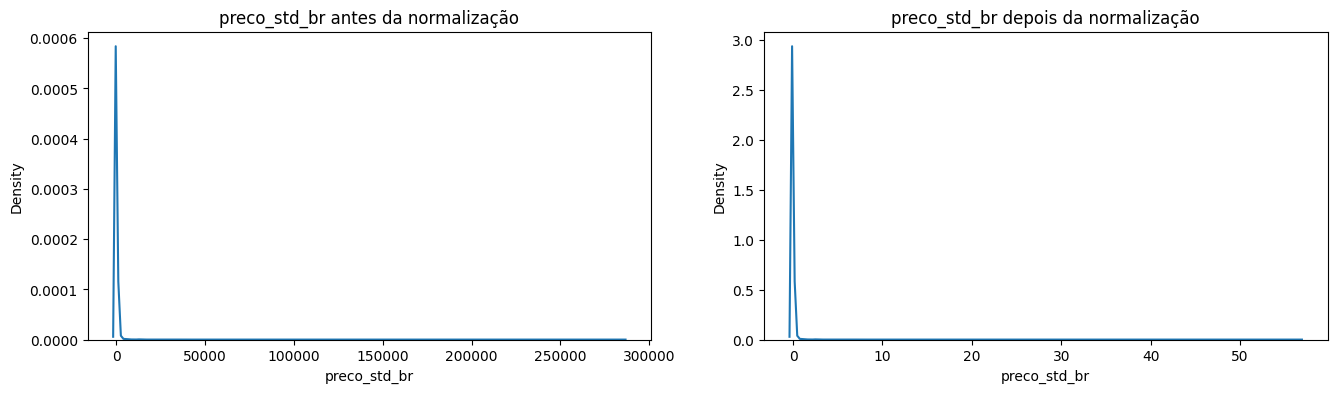

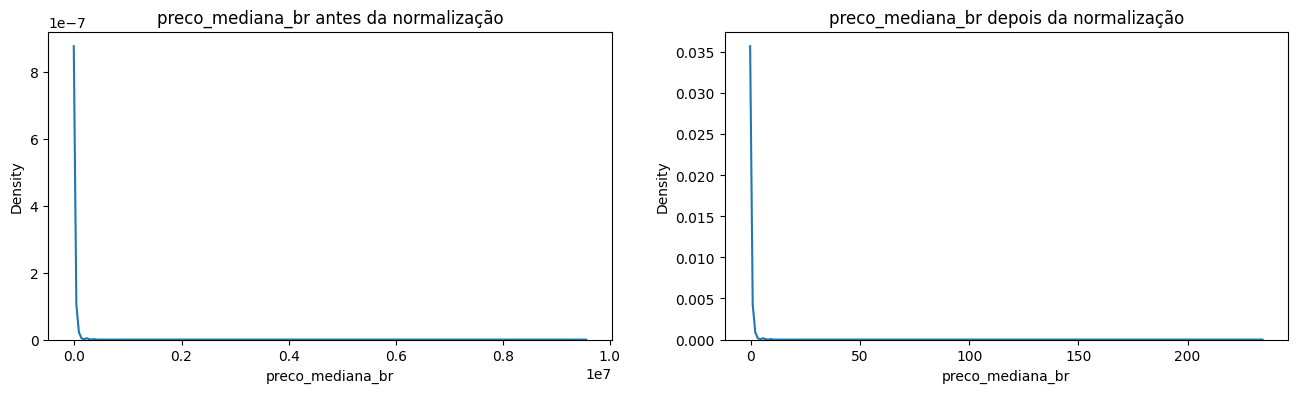

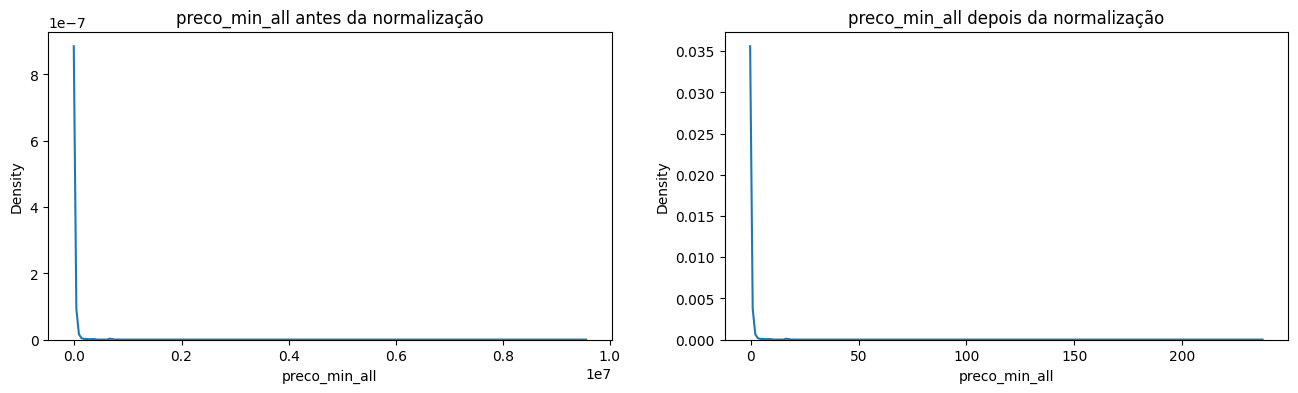

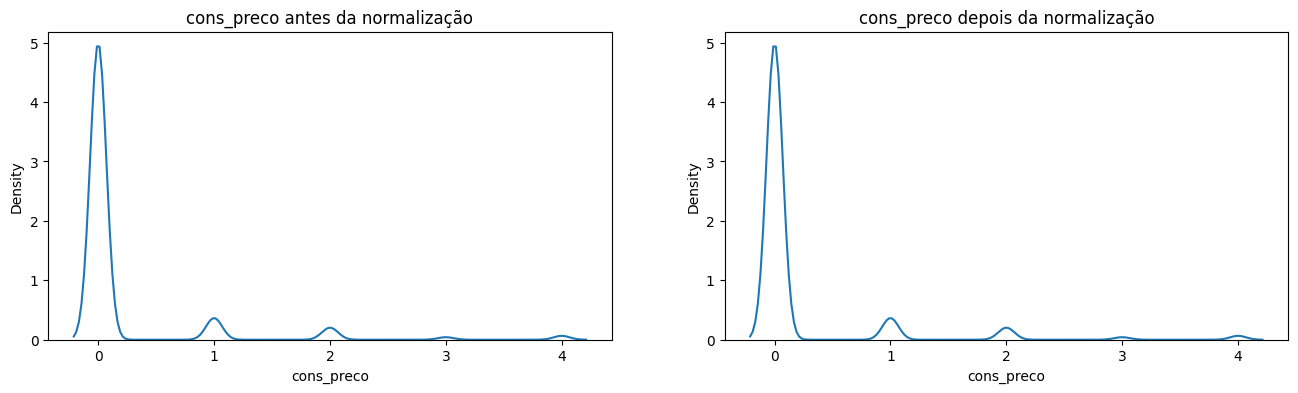

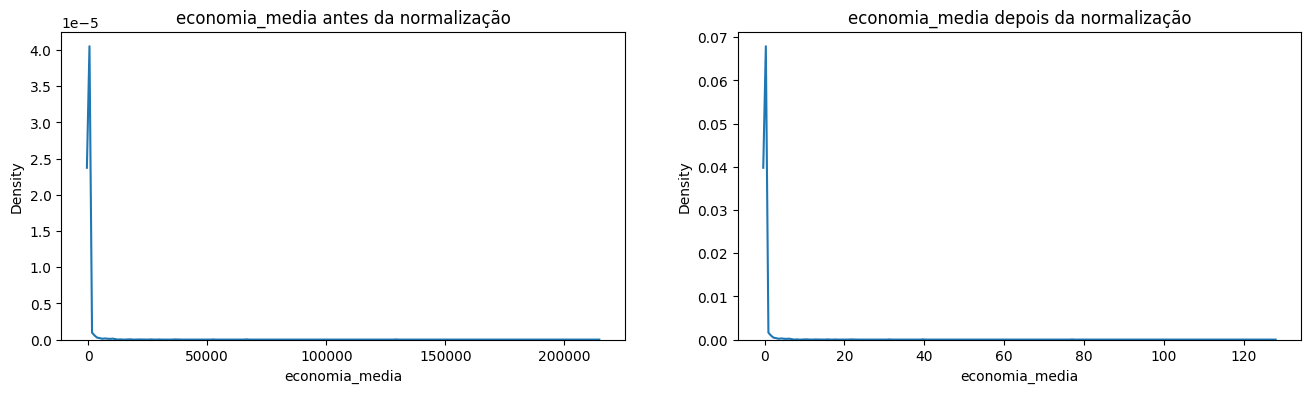

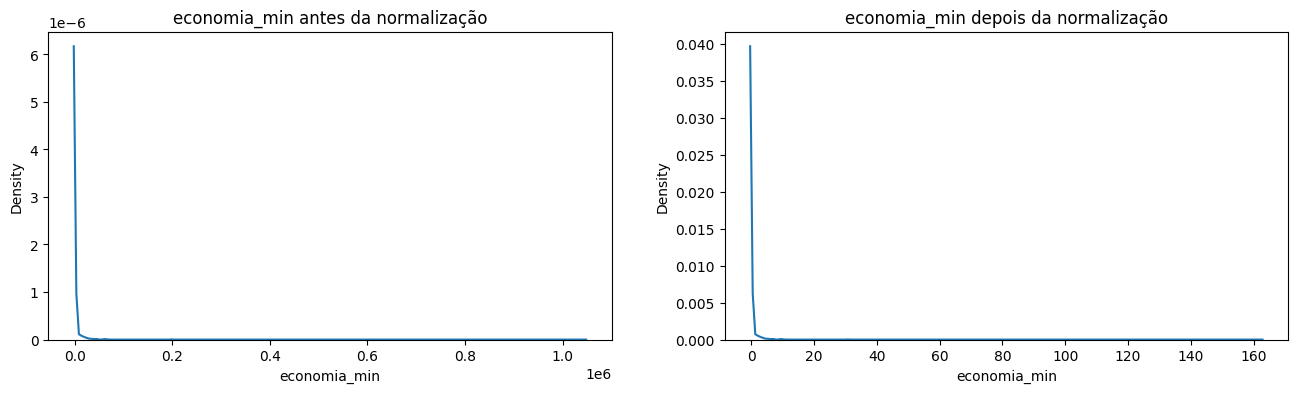

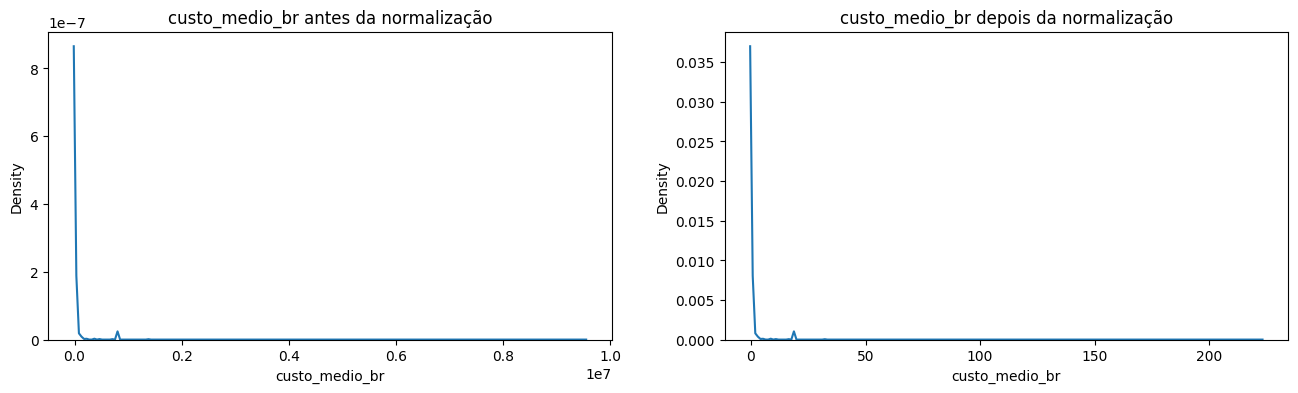

In [ ]:
# Plota as densidades de probabilidade antes e depois da normalização
for col in num_cols:
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4))

    # Plot da densidade de probabilidade antes da normalização
    sns.kdeplot(data_pca[col], ax=ax[0])
    ax[0].set_title(f"{col} antes da normalização")

    # Plot da densidade de probabilidade depois da normalização
    sns.kdeplot(data_normalized[col], ax=ax[1])
    ax[1].set_title(f"{col} depois da normalização")

    plt.show()


In [ ]:
data_pca2 = data_normalized

# Aplicando o PCA

In [ ]:
#DIvidindo as bases de treino e de teste

from sklearn.model_selection import train_test_split

data_rf_pca = data_pca2

# Separar os dados em variáveis preditoras (X) e target (y)
X = data_rf_pca.drop('cons_preco', axis=1)
y = data_rf_pca['cons_preco']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#rodando o PCA

from sklearn.decomposition import PCA


# Cria um objeto PCA com n_components=0.95 para manter 95% da variância
pca = PCA(n_components=0.95)

# Aplica o PCA nos dados X e armazena em X_pca
X_pca_res = pca.fit_transform(X_train)

X_pca_res2 = pd.DataFrame(X_pca_res, index=y_train.index)


# Criando o novo dataframe com as novas features geradas pelo PCA
data_pca_res = pd.concat([pd.DataFrame(X_pca_res2), y_train], axis=1)

# RFE pós PCA com class weight




In [ ]:
def predict_and_evaluate(X_test, y_test, model, average='macro'):

  # inferência do teste
  y_pred = model.predict(X_test) 

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average=average)
  print('F1: ', f1)

  from sklearn.metrics import precision_score, recall_score, roc_auc_score

  # Precisão
  precision = precision_score(y_test, y_pred, average='macro')
  print('Precisão: ', precision)

  # Recall
  recall = recall_score(y_test, y_pred, average='macro')
  print('Recall: ', recall)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix

  # Gerando a matriz de confusão
  confMatrix = confusion_matrix(y_test, y_pred)

  # Normalizando a matriz de confusão
  row_sums = confMatrix.sum(axis=1, keepdims=True)
  norm_confMatrix = confMatrix / row_sums

  ax = plt.subplot()
  sns.heatmap(norm_confMatrix, annot=True, fmt=".2f", cmap='Blues')
  ax.set_xlabel('Previsto')
  ax.set_ylabel('Real')
  ax.set_title('Matriz de Confusão Normalizada')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4']) 
  ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4'])
  plt.show()

  # Retornar as métricas
  return accuracy, kappa, f1, norm_confMatrix







In [ ]:
data_RFE=data_pca_res

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# separar as características e o target
X = data_RFE.drop('cons_preco', axis=1)
y = data_RFE['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instanciar o modelo
rf = RandomForestClassifier(class_weight={0: 1, 1: 10})

# treinar o modelo
rf.fit(X_train, y_train)

# fazer as previsões com o modelo treinado
y_pred = rf.predict(X_test)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'macro'

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      8109
         1.0       0.60      0.30      0.40       561
         2.0       0.72      0.41      0.53       350
         3.0       0.86      0.58      0.69        76
         4.0       0.33      0.08      0.13        88

    accuracy                           0.91      9184
   macro avg       0.69      0.47      0.54      9184
weighted avg       0.89      0.91      0.89      9184



Acurácia:  0.9074477351916377
Kappa:  0.4464131095366518
F1:  0.5391298710102533
Precisão:  0.6877351745952185
Recall:  0.47035678145351617


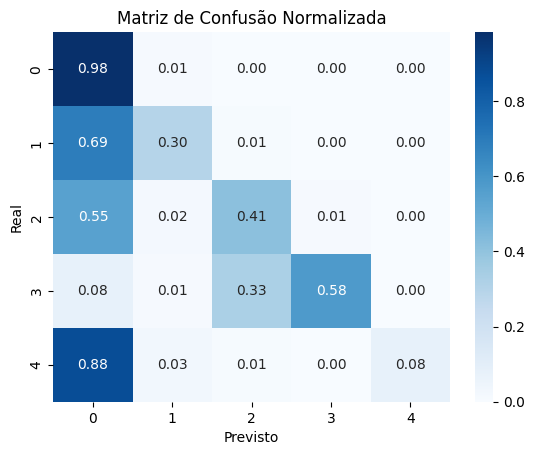

(0.9074477351916377,
 0.4464131095366518,
 0.5391298710102533,
 array([[9.83105192e-01, 1.20853373e-02, 3.08299420e-03, 2.46639536e-04,
         1.47983722e-03],
        [6.91622103e-01, 2.95900178e-01, 1.06951872e-02, 0.00000000e+00,
         1.78253119e-03],
        [5.45714286e-01, 2.28571429e-02, 4.14285714e-01, 1.42857143e-02,
         2.85714286e-03],
        [7.89473684e-02, 1.31578947e-02, 3.28947368e-01, 5.78947368e-01,
         0.00000000e+00],
        [8.75000000e-01, 3.40909091e-02, 1.13636364e-02, 0.00000000e+00,
         7.95454545e-02]]))

In [ ]:
predict_and_evaluate(X_test, y_test, rf)